In [33]:
import pandas as pd

def load_data():
    path = './ABC_Tick_Data/ABC_Level_One_Tick_Data.csv'
    return pd.read_csv(path)

In [34]:
data_raw = load_data()
data_raw.head()

,Time_Hour,Instrument_Code,Open,High,Low,Close,VWAP,TWAP,NumberOfTrades,Volume,Turnover,MinTimeHour,MaxTimeHour,Avg_Bid_Ask_Spread
0,2018-01-04 08:00:00+00:00,ABC,53.545455,54.254545,53.518182,54.209091,53.951161,53.989410,3365,254615.54550,1.663332e+09,2020-01-02 08:00:02.736099+00:00,2020-01-02 08:59:58.820761+00:00,-0.014760
1,2018-01-04 09:00:00+00:00,ABC,54.209091,54.363636,54.100000,54.290909,54.224500,54.225053,1368,77817.18182,5.105765e+08,2020-01-02 09:00:11.940563+00:00,2020-01-02 09:59:58.746897+00:00,0.013481
2,2018-01-04 10:00:00+00:00,ABC,54.281818,54.318182,54.218182,54.245455,54.265969,54.266231,909,58191.72727,3.820993e+08,2020-01-02 10:00:03.826511+00:00,2020-01-02 10:59:59.987086+00:00,0.011557
3,2018-01-04 11:00:00+00:00,ABC,54.245455,54.272727,54.118182,54.136364,54.183729,54.182949,501,34762.09091,2.279050e+08,2020-01-02 11:00:02.479285+00:00,2020-01-02 11:59:48.672869+00:00,0.011537
4,2018-01-04 12:00:00+00:00,ABC,54.181818,54.204591,54.100000,54.177318,54.158934,54.156843,474,34644.18182,2.270226e+08,2020-01-02 12:02:18.720769+00:00,2020-01-02 12:59:28.065067+00:00,-0.014078


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time_Hour           1023 non-null   object 
 1   Instrument_Code     1023 non-null   object 
 2   Open                1023 non-null   float64
 3   High                1023 non-null   float64
 4   Low                 1023 non-null   float64
 5   Close               1023 non-null   float64
 6   VWAP                1023 non-null   float64
 7   TWAP                1023 non-null   float64
 8   NumberOfTrades      1023 non-null   int64  
 9   Volume              1023 non-null   float64
 10  Turnover            1023 non-null   float64
 11  MinTimeHour         1023 non-null   object 
 12  MaxTimeHour         1023 non-null   object 
 13  Avg_Bid_Ask_Spread  1023 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 112.0+ KB


In [4]:
data_raw.describe()

,Open,High,Low,Close,VWAP,TWAP,NumberOfTrades,Volume,Turnover,Avg_Bid_Ask_Spread
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1.023000e+03,1.023000e+03,1023.000000
mean,44.006158,44.237205,43.773590,44.003787,44.014833,44.000656,3476.335288,3.947106e+05,2.054690e+09,-0.008525
std,7.045234,7.066492,7.152791,7.043902,7.053277,7.042722,3215.359465,4.901335e+05,2.600115e+09,0.157476
min,33.636364,33.785909,6.339418,33.631818,33.647405,33.658734,1.000000,4.454545e+00,2.695991e+04,-0.945191
25%,37.102273,37.268182,36.956818,37.131818,37.116435,37.113900,1379.000000,1.127750e+05,5.820509e+08,0.000469
50%,43.536364,43.968182,43.263636,43.595455,43.639305,43.640611,2487.000000,2.155232e+05,1.088315e+09,0.009007
75%,51.326005,51.509363,51.154545,51.295455,51.294998,51.269325,4414.500000,4.635416e+05,2.438367e+09,0.011248
max,54.354545,67.363636,54.336364,54.381818,56.555639,54.385951,24857.000000,4.424551e+06,2.483121e+10,1.941967


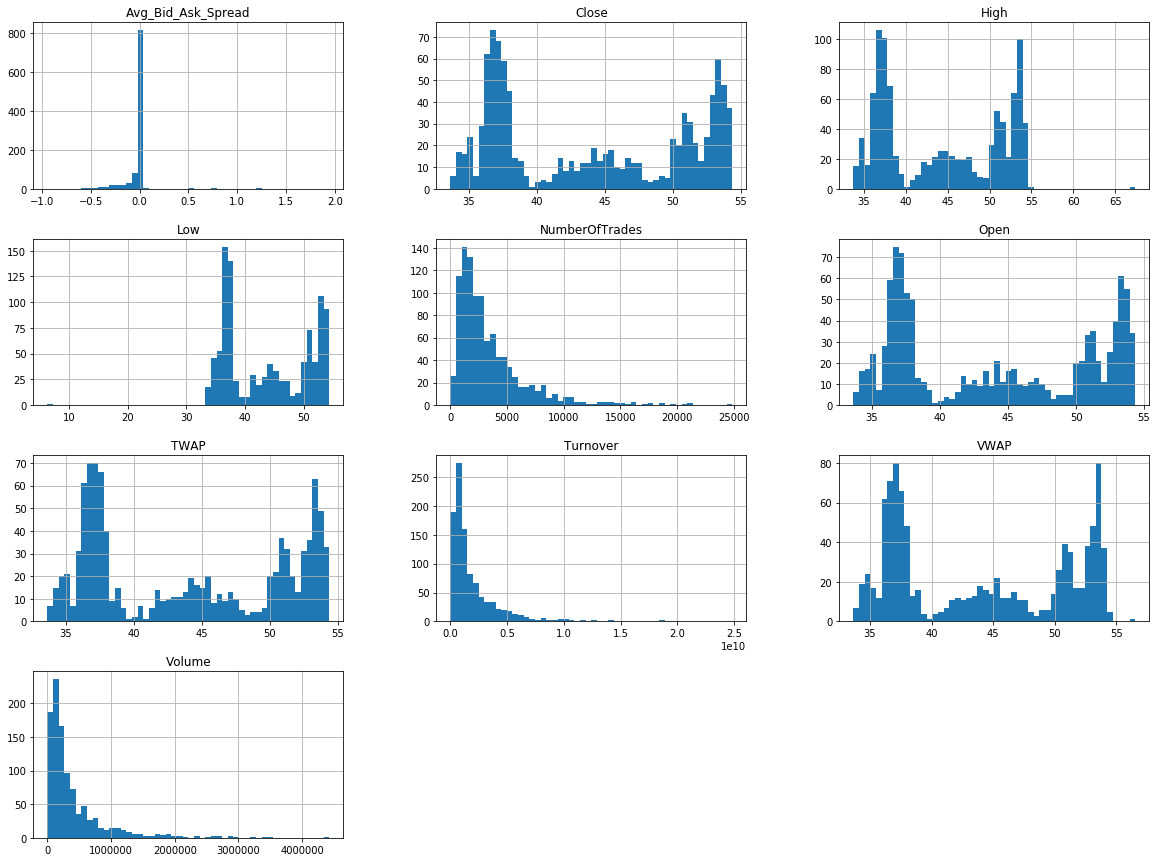

In [5]:
import matplotlib.pyplot as plt

data_raw.hist(bins=50, figsize=(20,15))
plt.show()

### Adding relevant features

In [6]:
data_raw['timeframe'] = 1
data_raw['horizon_hr'] = data_raw['timeframe'].cumsum()
data_raw['trade_num'] = data_raw['NumberOfTrades'].cumsum()
data_raw['volume'] = data_raw['Volume'].cumsum()
data_raw['liquidation_cost'] = data_raw['Avg_Bid_Ask_Spread'].cumsum()

In [7]:
data_selected = data_raw[['trade_num', 'volume','horizon_hr','liquidation_cost']]
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trade_num         1023 non-null   int64  
 1   volume            1023 non-null   float64
 2   horizon_hr        1023 non-null   int64  
 3   liquidation_cost  1023 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 32.1 KB


### Train set / test set split

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_selected, test_size=0.2, random_state=10)

In [9]:
len(train_set)

818

In [10]:
len(test_set)

205

In [11]:
corr_matrix = data_selected.corr()
corr_matrix['liquidation_cost'].sort_values(ascending=False)

liquidation_cost    1.000000
volume             -0.448214
trade_num          -0.450198
horizon_hr         -0.539962
Name: liquidation_cost, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8346f0d710>,
      dtype=object)

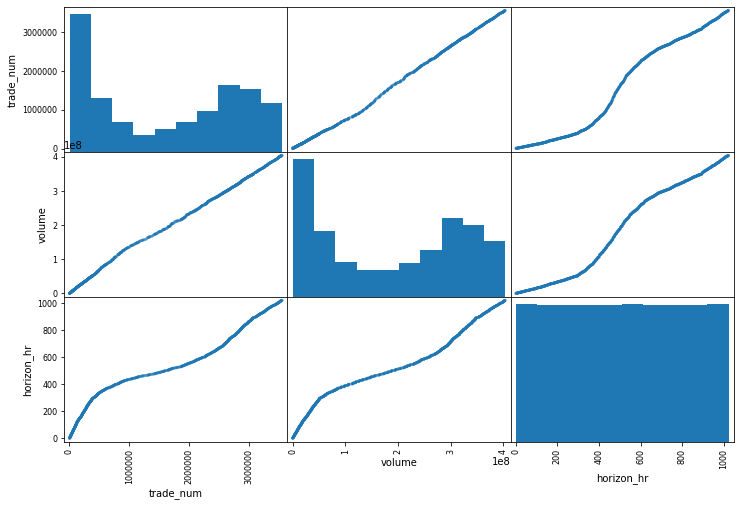

In [12]:
from pandas.plotting import scatter_matrix

attributes = ["trade_num", "volume", "horizon_hr"]
scatter_matrix(data_selected[attributes], figsize=(12, 8))

In [13]:
X = train_set[['trade_num','volume','horizon_hr']]
y = train_set[['liquidation_cost']]

### Cross validation & model selection

In [15]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np

liq_cost_predictions = lin_reg.predict(X)
lin_mse = mean_squared_error(y, liq_cost_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.2271236747075285

In [18]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, X, y, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.25541408 1.15068367 1.08152059 1.23236301 1.25903444 1.25524823
 1.23400859 1.23116064 1.27938122 1.33167891]
Mean: 1.2310493385808998
Standard deviation: 0.06576675234291361


In [19]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)

DecisionTreeRegressor()

In [20]:
liq_cost_predictions = tree_reg.predict(X)
tree_mse = mean_squared_error(y, liq_cost_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [21]:
tree_scores = cross_val_score(tree_reg, X, y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [0.27170112 0.11423873 0.15627434 0.18390035 0.17468823 0.12705348
 0.16872373 0.06744221 0.1842071  0.21137359]
Mean: 0.16596028648208958
Standard deviation: 0.05288722582062259


In [22]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X, y.values.ravel())

RandomForestRegressor()

In [23]:
liq_cost_predictions = forest_reg.predict(X)
forest_mse = mean_squared_error(y, liq_cost_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.05025885347554798

In [24]:
forest_scores = cross_val_score(forest_reg, X, y.values.ravel(), scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.19384355 0.07034568 0.11477232 0.13075737 0.15893788 0.10112671
 0.12637742 0.07329219 0.12926334 0.19992885]
Mean: 0.12986452998168424
Standard deviation: 0.04202078234146036


### Fine tuning hyperparameters 

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [5,10,20,50], 'max_features': [2, 3]},
    {'bootstrap': [False], 'n_estimators': [5,10,20,50], 'max_features': [2, 3]},
    ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=10, scoring='neg_mean_squared_error', 
                           return_train_score=True)

grid_search.fit(X, y.values.ravel())

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 3],
                          'n_estimators': [5, 10, 20, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3],
                          'n_estimators': [5, 10, 20, 50]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [26]:
grid_search.best_estimator_

RandomForestRegressor(max_features=3, n_estimators=20)

In [27]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.1550090275375773 {'max_features': 2, 'n_estimators': 5}
0.14508003775162762 {'max_features': 2, 'n_estimators': 10}
0.13854611283935292 {'max_features': 2, 'n_estimators': 20}
0.1409322247143928 {'max_features': 2, 'n_estimators': 50}
0.14953699935876005 {'max_features': 3, 'n_estimators': 5}
0.14549604921569279 {'max_features': 3, 'n_estimators': 10}
0.13369634210091938 {'max_features': 3, 'n_estimators': 20}
0.13580956522856497 {'max_features': 3, 'n_estimators': 50}
0.17109708730059 {'bootstrap': False, 'max_features': 2, 'n_estimators': 5}
0.15327174169692692 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.15612600225257733 {'bootstrap': False, 'max_features': 2, 'n_estimators': 20}
0.1560030303306505 {'bootstrap': False, 'max_features': 2, 'n_estimators': 50}
0.15690888103602071 {'bootstrap': False, 'max_features': 3, 'n_estimators': 5}
0.15898153133278992 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.15461458515522722 {'bootstrap': False, 'max_feat

In [28]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.27122492, 0.45692913, 0.27184595])

In [30]:
final_model = grid_search.best_estimator_

X_test = test_set[['trade_num','volume','horizon_hr']]
y_test = test_set[['liquidation_cost']]

final_predictions = final_model.predict(X_test)

In [31]:
final_predictions[:5]

array([-8.59446612, -8.09627736, -1.88302945, -4.94064572, -8.02754294])

In [32]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.11286049105638234